In [9]:
!pip install pyspark
!pip install seaborn
!pip install matplotlib
!pip install experta

In [10]:
# Importing libraries
from pyspark.sql import SQLContext
from pyspark.sql.functions import isnan, when, count, col, translate, avg, count, split, lit
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql import functions as F
from pyspark import SparkContext
import matplotlib.pyplot as plt
import seaborn as sns
from experta import Fact, Rule, KnowledgeEngine


AttributeError: module 'collections' has no attribute 'Mapping'

In [ ]:
# Initializing Spark
sc = SparkContext()

sqlContext = SQLContext(sc)

c:\Users\emirp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# Read .csv file
df = sqlContext.read.csv("nutrition_1.csv", header=True, inferSchema = True)

In [ ]:
df.show()

+---+--------+--------+----+------------+--------------------+--------------------+
| id|calories|proteins| fat|carbohydrate|                name|               image|
+---+--------+--------+----+------------+--------------------+--------------------+
|  1|   280.0|     9.2|28.4|         0.0|                Abon|https://img-cdn.m...|
|  2|   513.0|    23.7|37.0|        21.3|        Abon haruwan|https://img-globa...|
|  3|     0.0|     0.0| 0.2|         0.0|           Agar-agar|https://res.cloud...|
|  4|    45.0|     1.1| 0.4|        10.8|  Akar tonjong segar|https://images.to...|
|  5|    37.0|     4.4| 0.5|         3.8|       Aletoge segar|https://nilaigizi...|
|  6|    85.0|     0.9| 6.5|         7.7|       Alpukat segar|https://katakabar...|
|  7|    96.0|     3.7| 0.6|        19.1|  Ampas kacang hijau|https://images.to...|
|  8|   414.0|    26.6|18.3|        41.3|          Ampas Tahu|https://palpres.d...|
|  9|    75.0|     4.1| 2.1|        10.7|    Ampas tahu kukus|https://cdns.d

In [ ]:
# Finding datatypes of columns
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- calories: double (nullable = true)
 |-- proteins: double (nullable = true)
 |-- fat: double (nullable = true)
 |-- carbohydrate: double (nullable = true)
 |-- name: string (nullable = true)
 |-- image: string (nullable = true)



In [ ]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|               id|          calories|          proteins|               fat|      carbohydrate|              name|               image|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|             1346|              1346|              1346|              1346|              1346|              1346|                1346|
|   mean|            673.5|203.21738484398216|10.001188707280825| 7.584026745913822|25.390193164933148|              NULL|                NULL|
| stddev|388.7010419332575| 163.0754297001602|11.847980020078733|13.733062879085635| 32.19305439591161|              NULL|                NULL|
|    min|                1|               0.0|               0.0|               0.0|               0.0|              Abon|1200px-Painted

# Step 1: Data Preprocessing

a. Checking for missing values

In [ ]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------+--------+---+------------+----+-----+
| id|calories|proteins|fat|carbohydrate|name|image|
+---+--------+--------+---+------------+----+-----+
|  0|       0|       0|  0|           0|   0|    0|
+---+--------+--------+---+------------+----+-----+



There are no missing values

b. Removing duplicates

In [ ]:
print("Number of rows before removing duplicates:", df.count())

Number of rows before removing duplicates: 1346


In [ ]:
df = df.dropDuplicates()

print("Number of rows in books_df after removing duplicates:", df.count())

Number of rows in books_df after removing duplicates: 1346


There are no duplicates

c. Removing irrelevant columns, in this case, the 'image' column

In [ ]:
df = df.drop('image')

In [ ]:
df.show()

+----+--------+--------+-----+------------+--------------------+
|  id|calories|proteins|  fat|carbohydrate|                name|
+----+--------+--------+-----+------------+--------------------+
|  76|   182.0|     2.4|  0.4|        42.2|Batatas tali ubi ...|
|  81|    51.0|     4.6|  0.5|        10.0|         Bayam Merah|
| 248|    27.0|     2.1|  0.7|         4.4|   Daun jonghe segar|
| 434|    66.0|    14.0|  0.0|         0.0|       Ikan Beunteur|
| 703|   359.0|     3.4| 34.7|        14.0|   Kelapa Tua daging|
| 736|    26.0|     1.7|  0.4|         3.8|       Kerokot segar|
| 993|   157.0|    28.0|  4.2|         0.0| Pindang Ikan Banjar|
|1000|   120.0|     1.1|  0.2|        26.8|   Pisang ayam segar|
|1047|    75.0|     1.6|  0.6|        15.8|       Rimbang segar|
|1083|   174.0|    19.6| 10.0|         0.0|Sapi daging kurus...|
|1236|   212.0|    17.5| 10.0|        12.9|Tempe kacang beli...|
| 105|   350.0|     2.7|  1.1|        82.3|        Beras Cerdas|
| 559|   350.0|     6.2| 

# Step 2: Data Visualization

a. Histograms of each macronutrient to derive insights of its distribution

array([[<Axes: title={'center': 'calories'}>]], dtype=object)

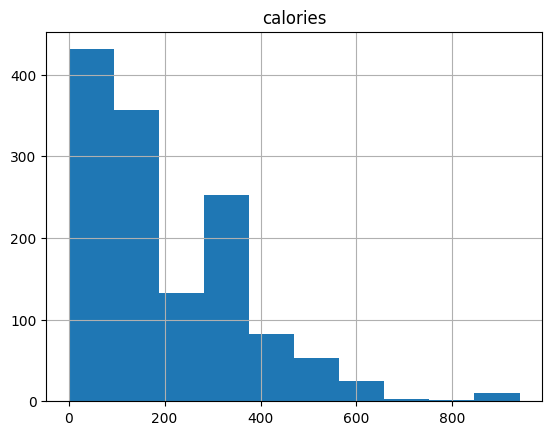

In [ ]:
df.select('calories').toPandas().hist()

array([[<Axes: title={'center': 'proteins'}>]], dtype=object)

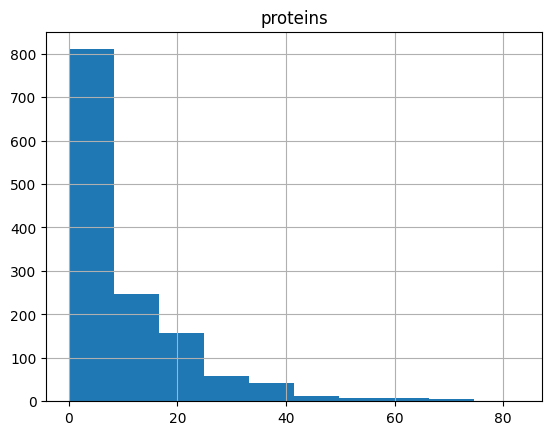

In [ ]:
df.select('proteins').toPandas().hist()

array([[<Axes: title={'center': 'fat'}>]], dtype=object)

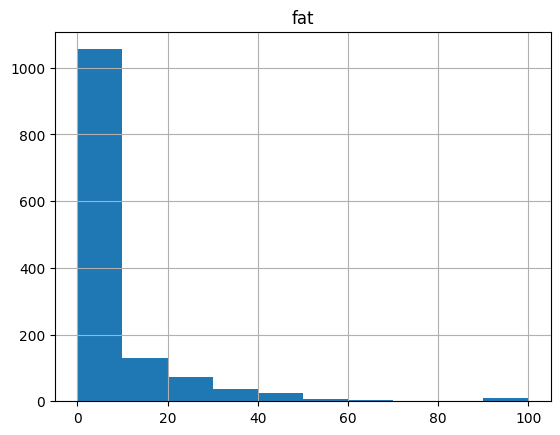

In [ ]:
df.select('fat').toPandas().hist()

array([[<Axes: title={'center': 'carbohydrate'}>]], dtype=object)

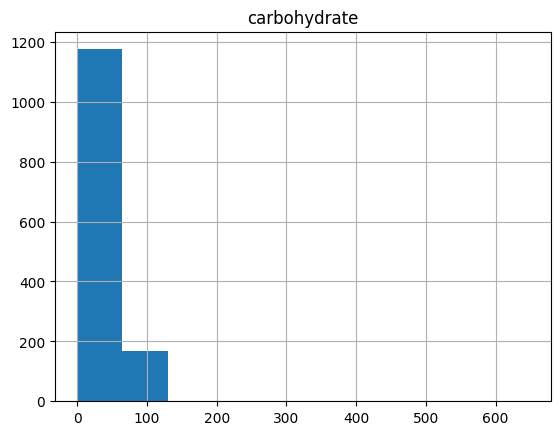

In [ ]:
df.select('carbohydrate').toPandas().hist()

b. Scatter plot, to visualize the relationship between two variables

First, we create a correlation matrix to find out which two nutrients have the most correlation, where:

- 1 means perfect positive correlation. If one variable increases, the other variable increases at the same rate
- 0 means there is no correlation between the two variables
- -1 means perfect negative correlation. If one variable increases, the other variable decreases at the same rate

In [ ]:
# Select only the macronutrient columns
df_nutrients = df.select('calories', 'proteins', 'fat', 'carbohydrate')

# Calculate correlation matrix
corr_matrix = df_nutrients.toPandas().corr()

# Print the correlation matrix
print(corr_matrix)

              calories  proteins       fat  carbohydrate
calories      1.000000  0.354371  0.737809      0.448363
proteins      0.354371  1.000000  0.225326     -0.133289
fat           0.737809  0.225326  1.000000     -0.003975
carbohydrate  0.448363 -0.133289 -0.003975      1.000000


From the matrix, we will create a scatter plot to visualize the relationship between calories and fat as they are have the most correlation.

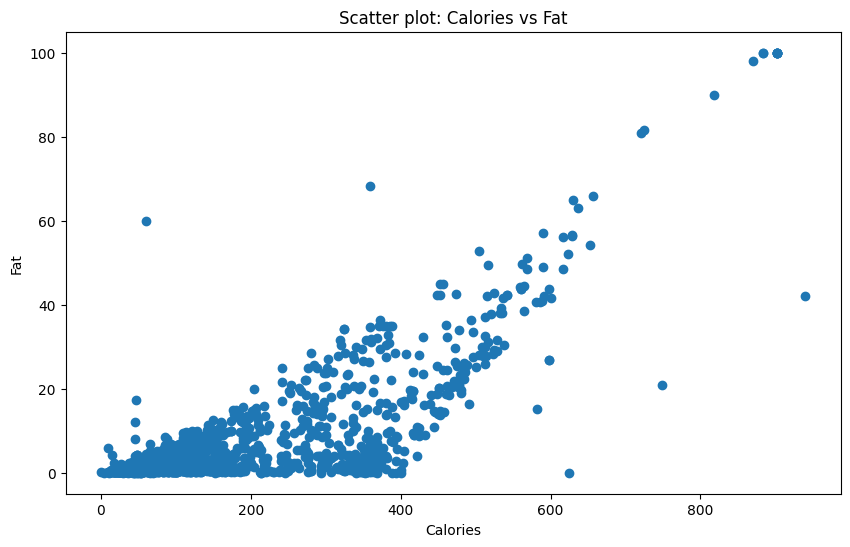

In [ ]:
# Convert to Pandas DataFrame for easier plotting
df = df.toPandas()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['calories'], df['fat'])
plt.title('Scatter plot: Calories vs Fat')
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.show()

# Step 3: Training a Rule-Based Model

# Step 4: Creating Interactive CLI